In [1]:
import sys
sys.path.append('/Users/pradap/Documents/Research/Python-Package/scaling/dmagellan/')

In [2]:
from dmagellan.blocker.attrequivalence.attr_equiv_blocker import AttrEquivalenceBlocker
from dmagellan.blocker.overlap.overlapblocker import OverlapBlocker
from dmagellan.blocker.blackbox.blackbox_blocker import BlackBoxBlocker
from dmagellan.blocker.rulebased.rule_based_blocker import RuleBasedBlocker
from dmagellan.feature.autofeaturegen import get_features_for_blocking

In [3]:
# imports
import py_entitymatching as em
from dask.sharedict import ShareDict, merge
from dask.dot import dot_graph

from dmagellan.optimization.dictutils import *
from dmagellan.utils.py_utils.sample_fns import test_create_dag

In [4]:
# dag1 = em.load_object('./dag-1.pkl')
# dag = dict(dag1.dask)   

b_dag = test_create_dag()
dag = dict(b_dag.dask)

Reading the files done


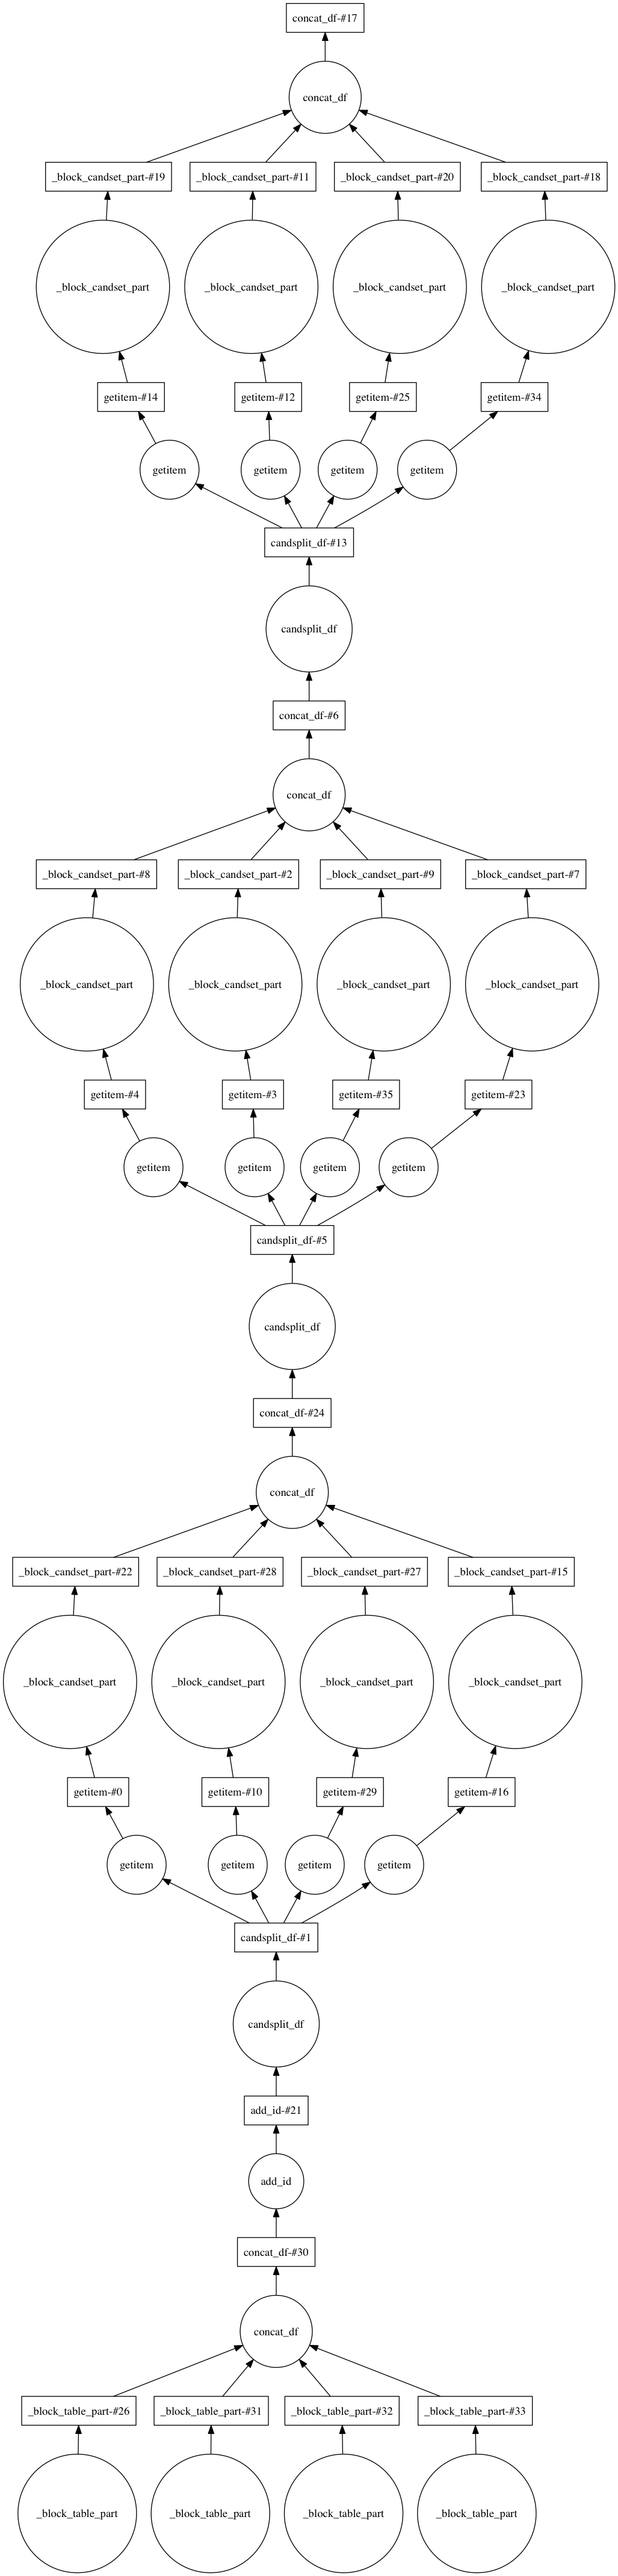

In [5]:
b_dag.visualize()

In [6]:
blocker_list = get_blocker_subgraphs(dag)

In [7]:
print_blocker_list_props(blocker_list)

{'iscand': False, 'type': 'AttrEquivalenceBlocker'}
{'iscand': True, 'type': 'RuleBasedBlocker'}
{'iscand': True, 'type': 'OverlapBlocker'}
{'iscand': True, 'type': 'BlackBoxBlocker'}


In [8]:
vis(blocker_list)

In [6]:
r_blocker_list = order_candset_blockers(blocker_list)

In [7]:
# print_blocker_list_props(r_blocker_list)

In [8]:
# def upd_blocker_inp_links(blocker_list):
#     for i in range(len(blocker_list) - 1):
#         cur = blocker_list[i]
#         nxt = blocker_list[i+1]
        
#         if i == 0:
#             # case: head
#             assert(iscand(cur) == False)
#             upd_split_df_input_node(nxt, get_keys(cur, 'add_id')[0])
#         else:
#             # case: candset
#             assert(iscand(cur) == True)
#             upd_split_df_input_node(nxt, get_keys(cur, 'concat_df')[0])
#     return blocker_list

In [9]:
u_blocker_list = upd_blocker_inp_links(r_blocker_list)

In [10]:
comp(b_dag, u_blocker_list)

,_id,l_ID,r_ID,l_name,l_address,l_zipcode,r_name,r_address,r_zipcode
0,0,1,2,Michael Franklin,"1652 Stockton St, San Francisco",94122,Mike Franklin,"1652 Stockton St, San Francisco",94122
1,1,2,1,William Bridge,"3131 Webster St, San Francisco",94107,Bill Bridge,"3131 Webster St, San Francisco",94107
2,4,4,4,Alphonse Kemper,"1702 Post Street, San Francisco",94122,Alfons Kemper,"170 Post St, Apt 4, San Francisco",94122


In [11]:
# print_blocker_list_props(u_blocker_list)

In [43]:
a_blocker_list = move_add_id_to_last(u_blocker_list)

In [13]:
vis(a_blocker_list)

In [14]:
comp(b_dag, a_blocker_list)

,_id,l_ID,r_ID,l_name,l_address,l_zipcode,r_name,r_address,r_zipcode
0,0,1,2,Michael Franklin,"1652 Stockton St, San Francisco",94122,Mike Franklin,"1652 Stockton St, San Francisco",94122
1,1,2,1,William Bridge,"3131 Webster St, San Francisco",94107,Bill Bridge,"3131 Webster St, San Francisco",94107
2,2,4,4,Alphonse Kemper,"1702 Post Street, San Francisco",94122,Alfons Kemper,"170 Post St, Apt 4, San Francisco",94122


In [27]:
get_table_chunks(a_blocker_list[0]), get_candset_chunks(a_blocker_list[1])

((2, 2), 4)

In [29]:
def ischunkscompatible(blocker1, blocker2):
    if not iscand(blocker1):
        nl, nr = get_table_chunks(blocker1)
        chunks1 = nl*nr
    else:
        chunks1 = get_candset_chunks(blocker1)
        
    if not iscand(blocker2):
        nl, nr = get_table_chunks(blocker2)
        chunks2 = nl*nr
    else:
        chunks2 = get_candset_chunks(blocker2)
    
    if chunks1 == chunks2:
        return True
    else:
        return False
    

In [31]:
ischunkscompatible(a_blocker_list[2], a_blocker_list[1])

True

In [ ]:
# work on removing concat df, split df

# condns
# current blocker and the next blockers chunks must match



In [33]:
b1, b2 = a_blocker_list[0], a_blocker_list[1]

In [40]:
c1 = get_keys(b1, 'concat_df')[0]
print(get_dependencies(b1, c1))

s2 = get_keys(b2, 'concat_df')[0]
print(get_dependencies(b2, s2))

['_block_table_part-2ce3888f-4c07-42ef-847d-355cc02df010', '_block_table_part-d1ebd5f5-922d-4a9b-ae5a-f14c10af8906', '_block_table_part-9fb80106-a9db-4750-b5eb-f7062e0f82ef', '_block_table_part-74ee752a-3d2a-482f-a165-ba4bfa2907e3']
['_block_candset_part-5a540fdb-dcf1-4bdd-8baf-d5797b0153c1', '_block_candset_part-69fb72a4-da31-4d76-815d-e5ff16de053e', '_block_candset_part-024b27fc-f51c-4452-8a4d-5b21fb015906', '_block_candset_part-3e1fdd37-b1c7-4594-9a31-6636ddc65289']


In [41]:
b2['_block_candset_part-5a540fdb-dcf1-4bdd-8baf-d5797b0153c1']

(<bound method OverlapBlocker._block_candset_part of <dmagellan.blocker.overlap.overlapblocker.OverlapBlocker instance at 0x11238f3b0>>,
 'getitem-77c4b3672503164cb291255ca87407f0',
 'lproj_df-b56a2475-108c-4e54-9999-e76a887d13c9',
 'rproj_df-3ba1d5ec-04ca-42ec-bdbf-645c789b6514',
 'l_ID',
 'r_ID',
 'ID',
 'ID',
 'name',
 'name',
 False,
 1)

In [134]:
def recurse_dep_keys(blocker, key, copy=True):
    if copy:
        blocker = deepcopy(blocker)
    inp = []
    out = set()
    inp.append(key)
    i = 0
    while(len(inp)):
        key = inp.pop(0)
#         print()
        out.add(key)
        deps = get_dependencies(blocker, key)
#         print key, deps
        if key_split(key) != '_block_tables_part' and key_split(key) != '_block_candset_part':
            inp.extend(deps)
        else:
            inp.append(deps[0])
#         print(i)
#         print(out)
#         i+=1
    return out
        
        
        

In [135]:
def remove_concat_split(blocker1, blocker2, copy=True):
    if copy:
        blocker1 = deepcopy(blocker1)
        blocker2 = deepcopy(blocker2)
    print('Inside')
    compat = ischunkscompatible(blocker1, blocker2)
    if compat:
        concat_df1 = get_keys(blocker1, 'concat_df')[0]
        dep1 = get_dependencies(blocker1, concat_df1) # this will be a list of blocker outputs
        
        concat_df2 = get_keys(blocker2, 'concat_df')[0]
        dep2 = get_dependencies(blocker2, concat_df2) # this will be a list of blocker outputs
        
        blocker1_keys_to_remove = set()
        blocker2_keys_to_remove = set()
        
        blocker1_keys_to_remove.add(concat_df1)
        for i in range(len(dep1)):
            blocker2_vals = list(blocker2[dep2[i]])
            old_dep = blocker2_vals[1]
            blocker2_vals[1] = dep1[i]
            blocker2[dep2[i]] = tuple(blocker2_vals)
#             print(old_dep)
        
            t = recurse_dep_keys(blocker2, old_dep)
#             print(blocker2_keys_to_remove)
            blocker2_keys_to_remove.update(t)
        
        # clean up unnecessary stuff:
        # blocker1: remove concat df
        print(blocker2_keys_to_remove)
        for key in blocker1_keys_to_remove:
            del blocker1[key]
        for key in blocker2_keys_to_remove:
#             print(key)
            del blocker2[key]

        
#         print(blocker1_keys_to_remove)
#         print(blocker2_keys_to_remove)
        # blocker2
    return blocker1, blocker2
            
            
        

In [140]:
k = remove_concat_split(a_blocker_list[0], a_blocker_list[1])

Inside
set(['candsplit_df-344a47f5-1207-448b-8bf6-0badd9dd5079', 'getitem-44ae88aa37279192aef6fe00163e19dd', 'getitem-ae5c22a135a585b5852ea595e6e300b0', 'getitem-77c4b3672503164cb291255ca87407f0', 'getitem-20bcf6d2550e95ee7876ff290b0e72ee'])


In [142]:
dag

{'_block_candset_part-024b27fc-f51c-4452-8a4d-5b21fb015906': (<bound method OverlapBlocker._block_candset_part of <dmagellan.blocker.overlap.overlapblocker.OverlapBlocker instance at 0x1122d1dd0>>,
  'getitem-20bcf6d2550e95ee7876ff290b0e72ee',
  'lproj_df-b56a2475-108c-4e54-9999-e76a887d13c9',
  'rproj_df-3ba1d5ec-04ca-42ec-bdbf-645c789b6514',
  'l_ID',
  'r_ID',
  'ID',
  'ID',
  'name',
  'name',
  False,
  1),
 '_block_candset_part-0ac5f780-f45f-4d7a-a7d6-bf05cab6a0cf': (<bound method RuleBasedBlocker._block_candset_part of <dmagellan.blocker.rulebased.rule_based_blocker.RuleBasedBlocker instance at 0x10c89d758>>,
  'getitem-a5e660a7e16e3798a307f826d9a80f78',
  'lproj_df-8a46af3c-2b4d-41db-a692-2b1dbc2131b1',
  'rproj_df-ef03561d-1060-4705-9112-36acd16511d3',
  'l_ID',
  'r_ID',
  'ID',
  'ID'),
 '_block_candset_part-1a1cc94d-35ae-4d76-8378-76721d4b8c1d': (<bound method BlackBoxBlocker._block_candset_part of <dmagellan.blocker.blackbox.blackbox_blocker.BlackBoxBlocker instance at 0x

In [106]:
help(dot_graph)

Help on function dot_graph in module dask.dot:

dot_graph(dsk, filename='mydask', format=None, **kwargs)
    Render a task graph using dot.
    
    If `filename` is not None, write a file to disk with that name in the
    format specified by `format`.  `filename` should not include an extension.
    
    Parameters
    ----------
    dsk : dict
        The graph to display.
    filename : str or None, optional
        The name (without an extension) of the file to write to disk.  If
        `filename` is None, no file will be written, and we communicate with
        dot using only pipes.  Default is 'mydask'.
    format : {'png', 'pdf', 'dot', 'svg', 'jpeg', 'jpg'}, optional
        Format in which to write output file.  Default is 'png'.
    **kwargs
        Additional keyword arguments to forward to `to_graphviz`.
    
    Returns
    -------
    result : None or IPython.display.Image or IPython.display.SVG  (See below.)
    
    Notes
    -----
    If IPython is installed, we retur

In [139]:
comp(b_dag, k)

,l_ID,r_ID,l_name,l_address,l_zipcode,r_name,r_address,r_zipcode
0,1,2,Michael Franklin,"1652 Stockton St, San Francisco",94122,Mike Franklin,"1652 Stockton St, San Francisco",94122
1,2,1,William Bridge,"3131 Webster St, San Francisco",94107,Bill Bridge,"3131 Webster St, San Francisco",94107
2,4,4,Alphonse Kemper,"1702 Post Street, San Francisco",94122,Alfons Kemper,"170 Post St, Apt 4, San Francisco",94122


In [144]:
_b = convert_ldicts_to_sdict(k)

In [145]:
a, b = fuse_linear(_b)

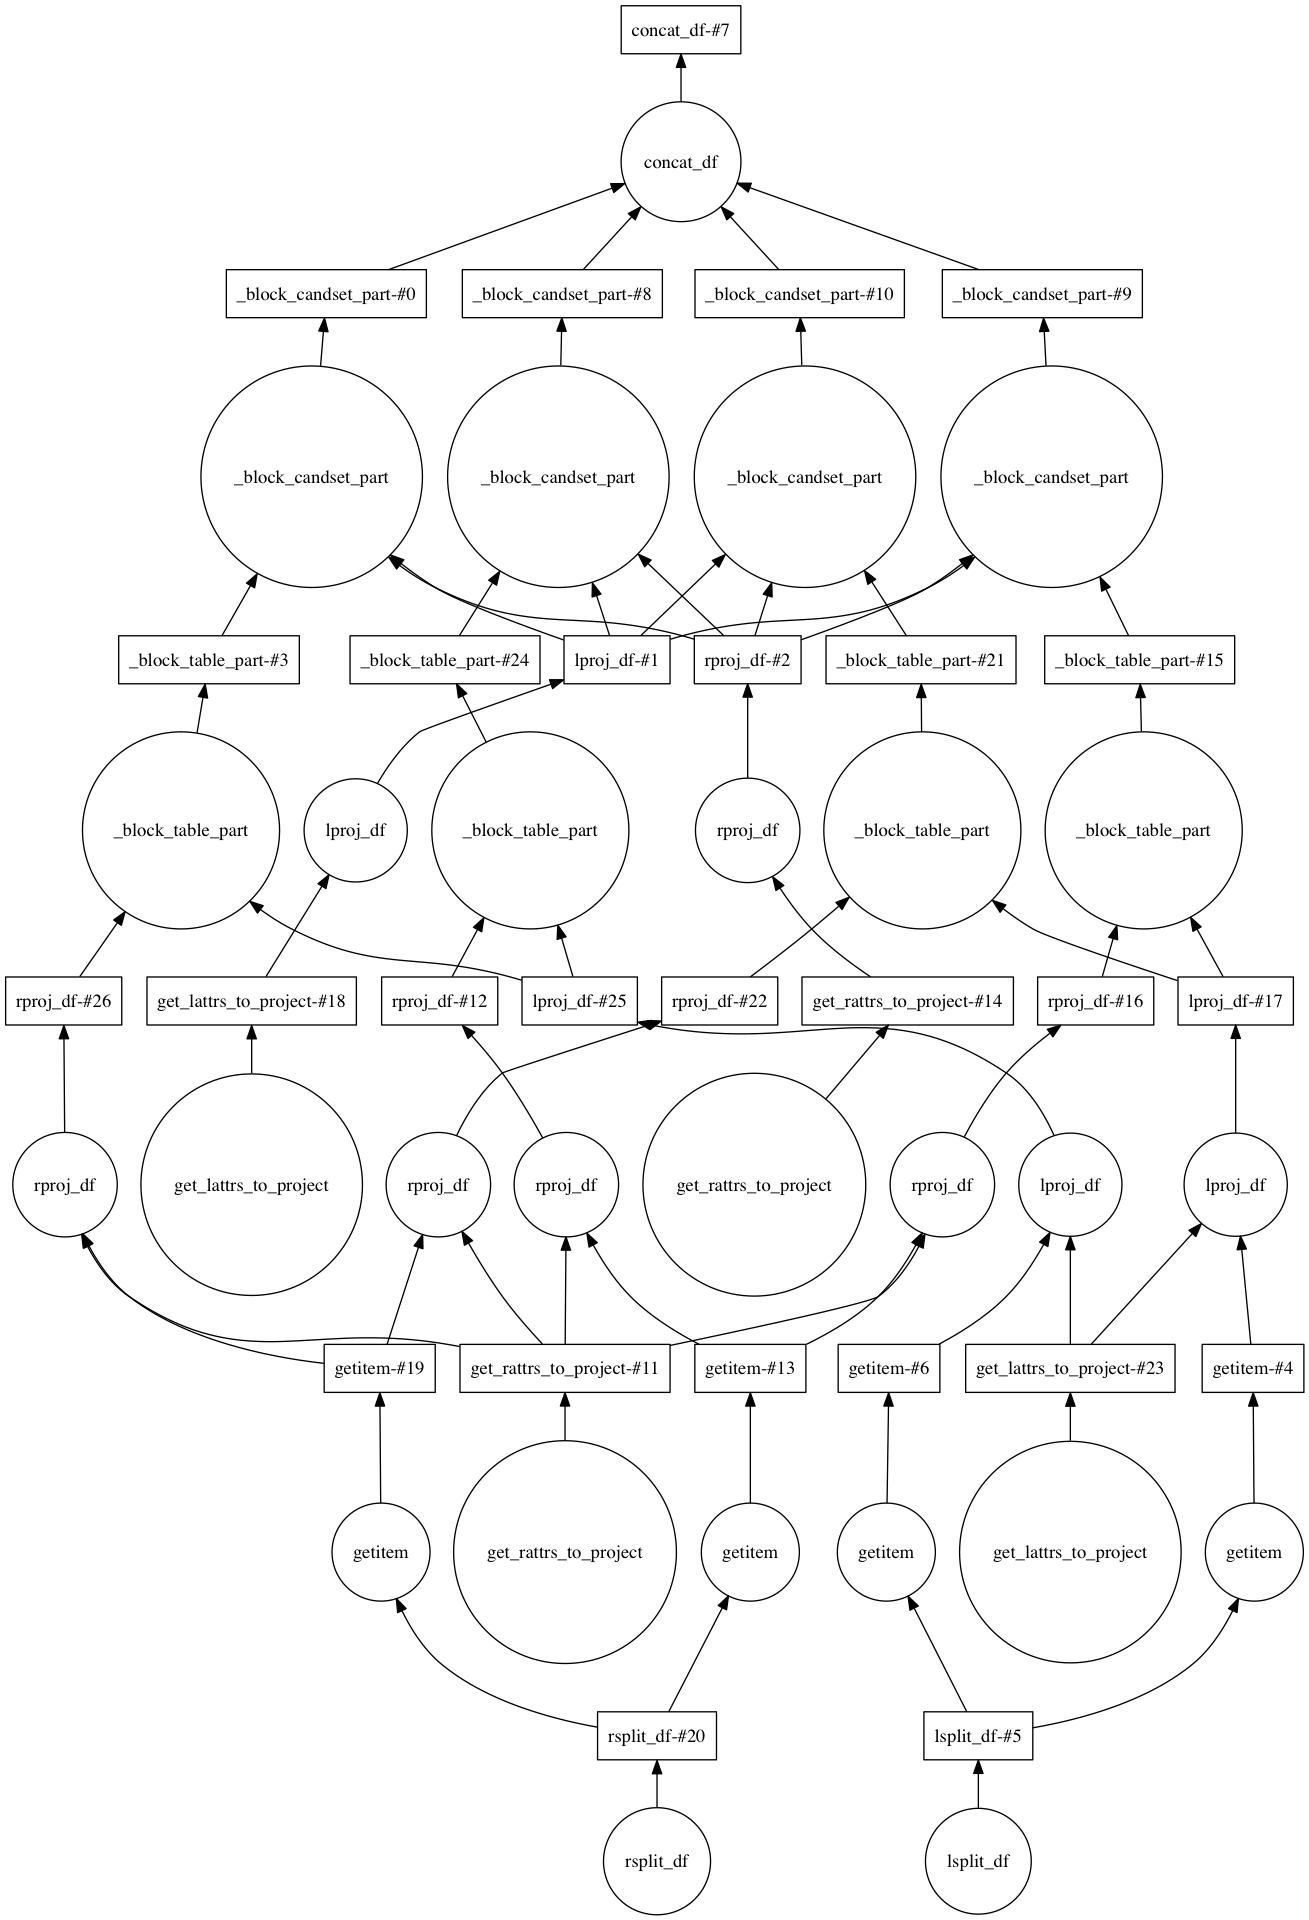

In [149]:
dot_graph(_b)

In [164]:
kk, ll = fuse(dict(_b), ave_width=5)

In [169]:
ll.keys()

[u'_block_table_part-rproj_df-_block_candset_part-69fb72a4-da31-4d76-815d-e5ff16de053e',
 '_block_candset_part-69fb72a4-da31-4d76-815d-e5ff16de053e',
 'concat_df-bad65692-46c8-4a77-a2eb-b7454fbfaf1c',
 u'_block_table_part-rproj_df-_block_candset_part-3e1fdd37-b1c7-4594-9a31-6636ddc65289',
 'get_rattrs_to_project-3d144322-fe17-4d59-9ec2-ed89a1a0df4f',
 u'get_rattrs_to_project-rproj_df-3ba1d5ec-04ca-42ec-bdbf-645c789b6514',
 u'_block_table_part-rproj_df-_block_candset_part-024b27fc-f51c-4452-8a4d-5b21fb015906',
 u'getitem-lproj_df-dcb21e69-c583-4369-9fda-4637b01c1582',
 '_block_candset_part-024b27fc-f51c-4452-8a4d-5b21fb015906',
 'lsplit_df-c8765e38-058d-46a7-a1bd-e4ab3cc070f9',
 'getitem-dc3b1d0b7f9ba9757cce645d9c52b96f',
 'rsplit_df-d2601df5-a217-4014-b916-120f2cc896f8',
 u'get_lattrs_to_project-lproj_df-b56a2475-108c-4e54-9999-e76a887d13c9',
 u'getitem-lproj_df-20e653c2-634f-412c-b6f8-d4a219c78172',
 'getitem-040af10c681ebae1daf5390ca71cfce0',
 'rproj_df-3ba1d5ec-04ca-42ec-bdbf-645c78

In [170]:
kk

{'_block_candset_part-024b27fc-f51c-4452-8a4d-5b21fb015906': u'_block_table_part-rproj_df-_block_candset_part-024b27fc-f51c-4452-8a4d-5b21fb015906',
 '_block_candset_part-3e1fdd37-b1c7-4594-9a31-6636ddc65289': u'_block_table_part-rproj_df-_block_candset_part-3e1fdd37-b1c7-4594-9a31-6636ddc65289',
 '_block_candset_part-5a540fdb-dcf1-4bdd-8baf-d5797b0153c1': u'_block_table_part-rproj_df-_block_candset_part-5a540fdb-dcf1-4bdd-8baf-d5797b0153c1',
 '_block_candset_part-69fb72a4-da31-4d76-815d-e5ff16de053e': u'_block_table_part-rproj_df-_block_candset_part-69fb72a4-da31-4d76-815d-e5ff16de053e',
 u'_block_table_part-rproj_df-_block_candset_part-024b27fc-f51c-4452-8a4d-5b21fb015906': (<bound method OverlapBlocker._block_candset_part of <dmagellan.blocker.overlap.overlapblocker.OverlapBlocker instance at 0x11251d488>>,
  (<bound method AttrEquivalenceBlocker._block_table_part of <dmagellan.blocker.attrequivalence.attr_equiv_blocker.AttrEquivalenceBlocker instance at 0x1124aecb0>>,
   'lproj_df-

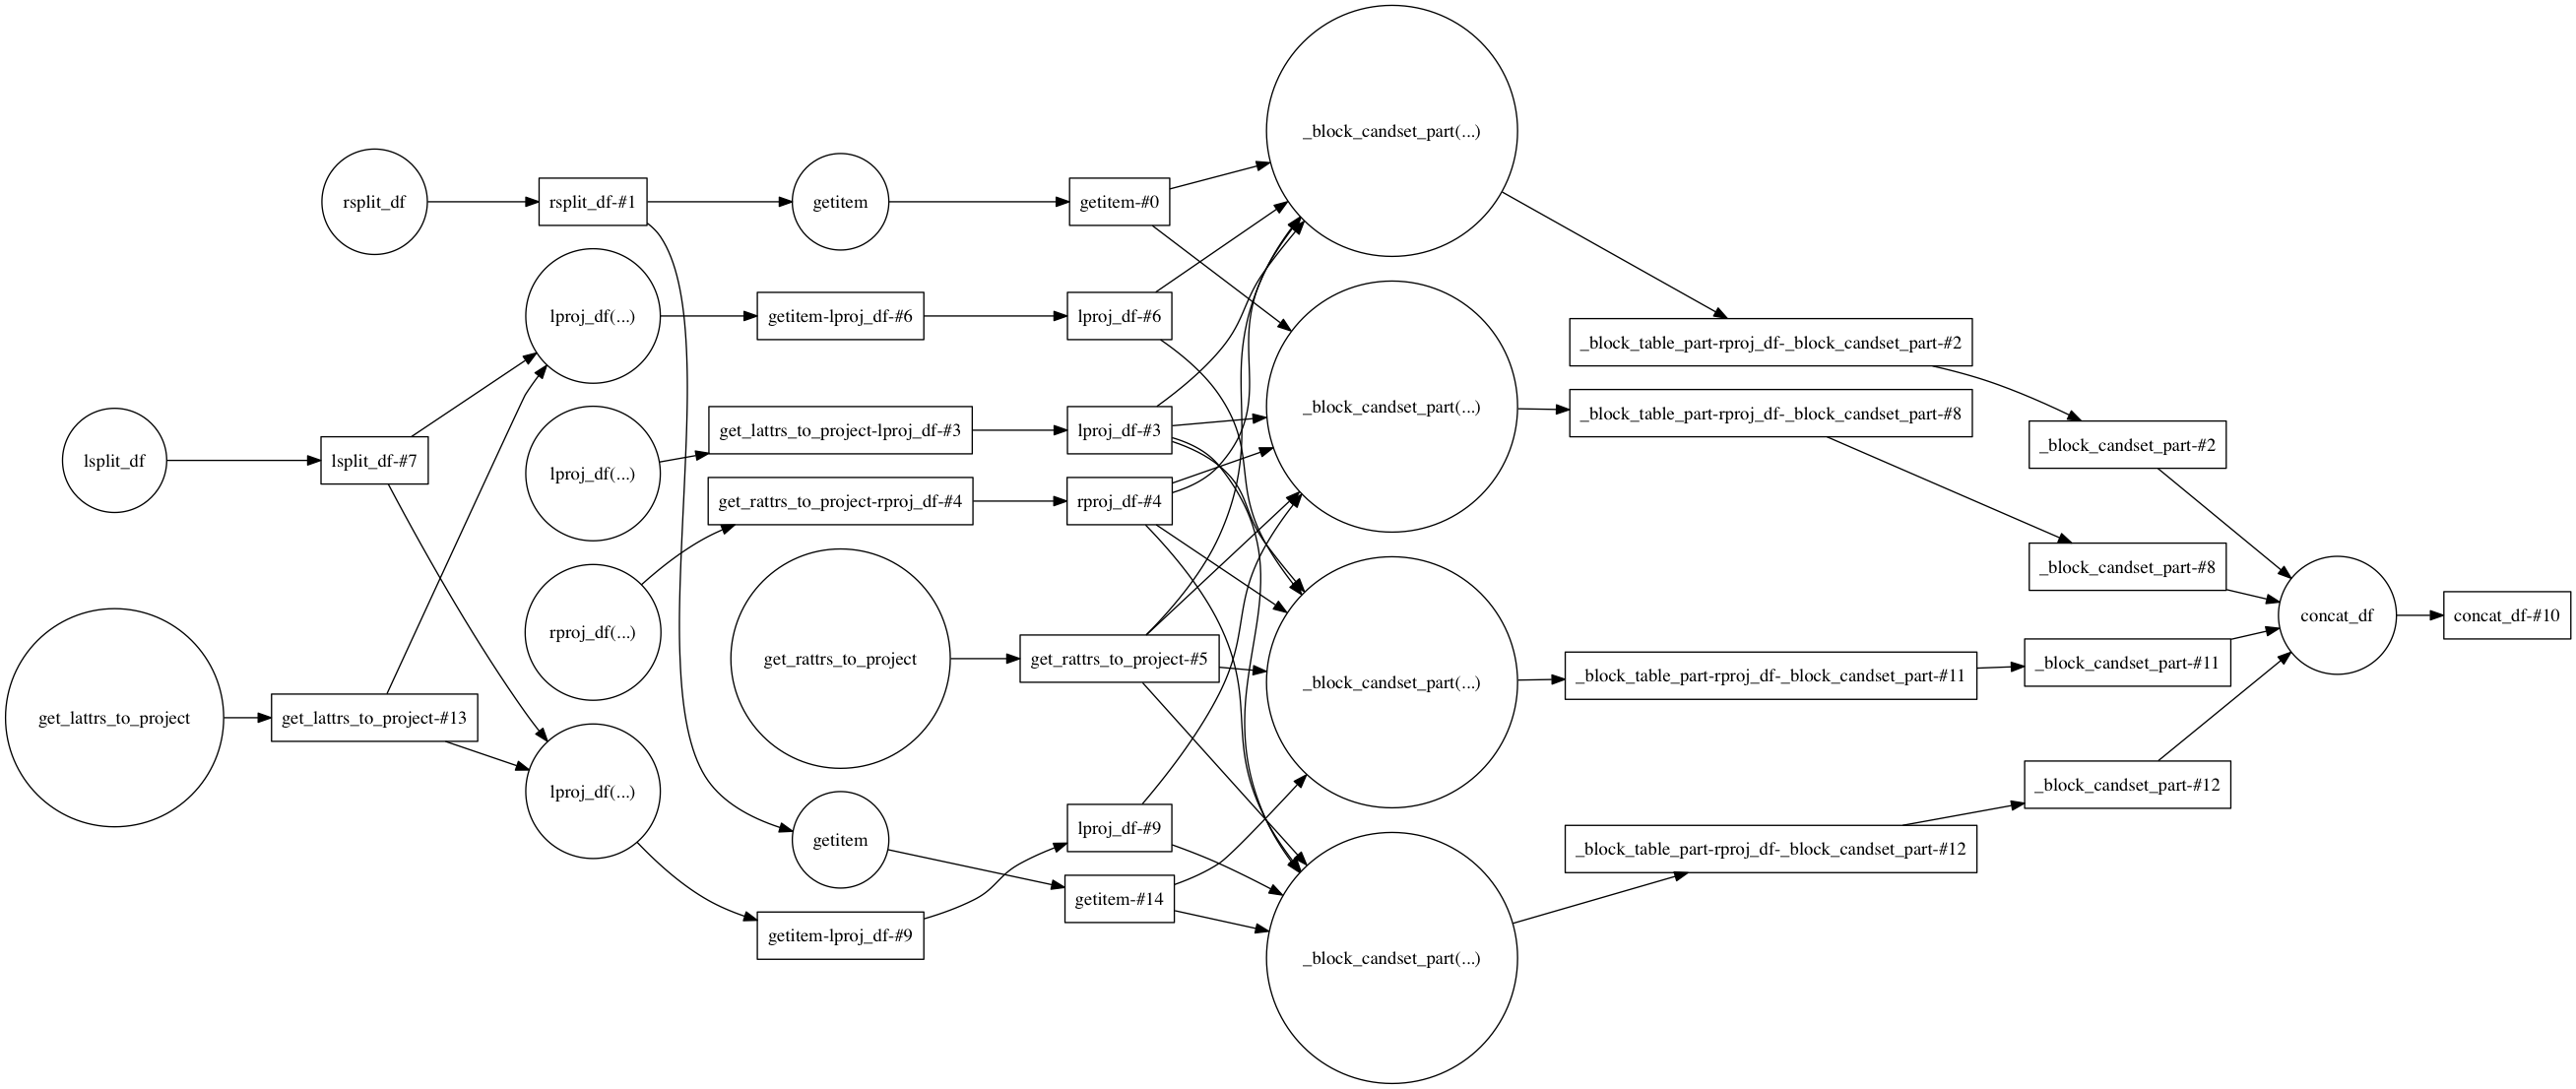

In [165]:
dot_graph(kk, rankdir='LR')

In [93]:
concat_df2 = get_keys(a_blocker_list[1], 'concat_df')[0]
get_dependencies(b2, concat_df2)[0]

'_block_candset_part-5a540fdb-dcf1-4bdd-8baf-d5797b0153c1'

In [95]:
recurse_dep_keys(b2, 'getitem-77c4b3672503164cb291255ca87407f0')

getitem-77c4b3672503164cb291255ca87407f0 ['candsplit_df-344a47f5-1207-448b-8bf6-0badd9dd5079']
candsplit_df-344a47f5-1207-448b-8bf6-0badd9dd5079 []


{'candsplit_df-344a47f5-1207-448b-8bf6-0badd9dd5079',
 'getitem-77c4b3672503164cb291255ca87407f0'}

In [71]:
get_dependencies(b2, get_dependencies(b2, get_dependencies(b2, get_dependencies(b2, concat_df2)[0])[0])[0])

[]

In [151]:
def inc(t):
    return t + 1

In [152]:
d = {'a': 1, 'b': (inc, 'a'), 'c': (inc, 'b')}

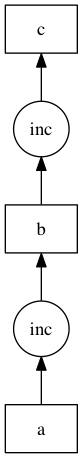

In [153]:
dot_graph(d)

In [155]:
kk, ll = fuse(d)

In [157]:
kk

{u'a-b-c': (<function __main__.inc>, (<function __main__.inc>, 1)),
 'c': u'a-b-c'}